# Save SR1.5 data

1. Download
2. Rename
3. Save to database

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path

import pandas as pd
import scmdata.database

import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
OUT_DIR = os.path.join(utils.DATA_DIR, "raw", "sr15-database")

<IPython.core.display.Javascript object>

In [4]:
!rm -r {OUT_DIR}
!OUT_DIR={OUT_DIR} python ../scripts/download-sr15-output.py

rm: cannot remove '/data2/ubuntu-znicholls/nicholls-et-al-2022-emulator-changes/src/utils/../../data/raw/sr15-database': No such file or directory
/data2/ubuntu-znicholls/nicholls-et-al-2022-emulator-changes/src/utils/../../data/raw/sr15-database
Connecting to SR1.5 database
Querying data
Saving to database
Saving to database
Saving to database
Saving to database
Saving to database


<IPython.core.display.Javascript object>

In [5]:
db = scmdata.database.ScmDatabase(OUT_DIR, levels=("variable",))

<IPython.core.display.Javascript object>

In [6]:
db.available_data()["variable"].to_list()

['AR5-climate-diagnostics-Concentration-CO2-FAIR-MED',
 'AR5-climate-diagnostics-Concentration-CO2-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-Aerosol-Direct-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-Aerosol-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-Aerosol-Total-FAIR-MED',
 'AR5-climate-diagnostics-Forcing-Aerosol-Total-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-CH4-FAIR-MED',
 'AR5-climate-diagnostics-Forcing-CH4-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-CO2-FAIR-MED',
 'AR5-climate-diagnostics-Forcing-CO2-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-F-Gases-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-FAIR-MED',
 'AR5-climate-diagnostics-Forcing-Kyoto-Gases-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-Montreal-Protocol--orig.--gases-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-N2O-FAIR-MED',
 'AR5-climate-diagnostics-Forcing-N2O-MAGICC6-MED',
 'AR5-climate-diagnostics-Forcing-OtherGHGs-FAIR-MED',


<IPython.core.display.Javascript object>

In [7]:
all_dat = db.load(variable=["AR5 climate*", "Emissions*"])
all_dat

Loading files:   0%|          | 0/159 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 37468, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      Kyoto-GHG|2010 (SAR)            category           model region  \
	0                  exclude            Above 2C   MERGE-ETL 6.0  World   
	1                  exclude            Above 2C  POLES CD-LINKS  World   
	2                  exclude            Above 2C  POLES CD-LINKS  World   
	3                  exclude            Lower 2C  POLES CD-LINKS  World   
	4                  exclude           Higher 2C  POLES CD-LINKS  World   
	...                    ...                 ...             ...    ...   
	37463             in range  1.5C low overshoot     AIM/CGE 2.1  World   
	37464             in range            Lower 2C     AIM/CGE 2.1  World   
	37465             in range            Lower 2C     AIM/CGE 2.1  World   
	37466             in range            Above 2C     AIM/CGE 2.1  World   
	37467             in range            Above 2C     AIM/CGE 2.1  W

<IPython.core.display.Javascript object>

In [8]:
co2_emms = all_dat.filter(variable="Emissions|CO2")
co2_emms

<scmdata.ScmRun (timeseries: 414, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      Kyoto-GHG|2010 (SAR)            category           model region  \
	22081              exclude            Above 2C   MERGE-ETL 6.0  World   
	22082              exclude            Above 2C  POLES CD-LINKS  World   
	22083              exclude            Above 2C  POLES CD-LINKS  World   
	22084              exclude            Lower 2C  POLES CD-LINKS  World   
	22085              exclude           Higher 2C  POLES CD-LINKS  World   
	...                    ...                 ...             ...    ...   
	22490             in range  1.5C low overshoot     AIM/CGE 2.1  World   
	22491             in range            Lower 2C     AIM/CGE 2.1  World   
	22492             in range            Lower 2C     AIM/CGE 2.1  World   
	22493             in range            Above 2C     AIM/CGE 2.1  World   
	22494             in range            Above 2C     AIM/CGE 2.1  Wor

<IPython.core.display.Javascript object>

In [9]:
co2_emms_cumulative = (
    co2_emms.interpolate(co2_emms.filter(year=range(2010, 2100 + 1))["time"])
    .integrate()
    .convert_unit("GtCO2")
)
all_dat = all_dat.append(co2_emms_cumulative)
all_dat

<scmdata.ScmRun (timeseries: 37882, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      Kyoto-GHG|2010 (SAR)            category           model region  \
	0                  exclude            Above 2C   MERGE-ETL 6.0  World   
	1                  exclude            Above 2C  POLES CD-LINKS  World   
	2                  exclude            Above 2C  POLES CD-LINKS  World   
	3                  exclude            Lower 2C  POLES CD-LINKS  World   
	4                  exclude           Higher 2C  POLES CD-LINKS  World   
	...                    ...                 ...             ...    ...   
	37877             in range  1.5C low overshoot     AIM/CGE 2.1  World   
	37878             in range            Lower 2C     AIM/CGE 2.1  World   
	37879             in range            Lower 2C     AIM/CGE 2.1  World   
	37880             in range            Above 2C     AIM/CGE 2.1  World   
	37881             in range            Above 2C     AIM/CGE 2.1  W

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='W/m2'>

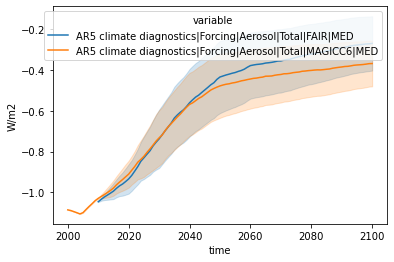

<IPython.core.display.Javascript object>

In [10]:
all_dat.filter(variable="*Aerosol|Total|*|MED").lineplot(hue="variable")

<AxesSubplot:xlabel='time', ylabel='W/m2'>

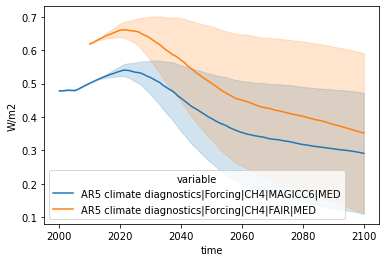

<IPython.core.display.Javascript object>

In [11]:
all_dat.filter(variable="*Forcing|CH4|*|MED").lineplot(hue="variable")

<AxesSubplot:xlabel='time', ylabel='W/m2'>

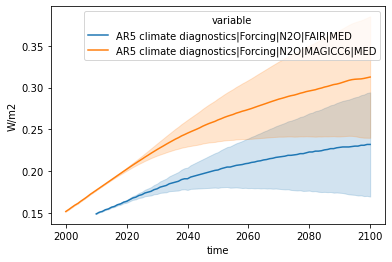

<IPython.core.display.Javascript object>

In [12]:
all_dat.filter(variable="*Forcing|N2O|*|MED").lineplot(hue="variable")

<AxesSubplot:xlabel='time', ylabel='W/m2'>

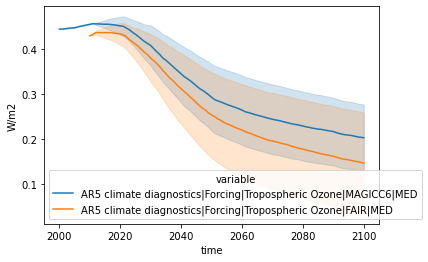

<IPython.core.display.Javascript object>

In [13]:
all_dat.filter(variable="*Forcing|*Ozone|*|MED").lineplot(hue="variable")

array(['MAGICC6', 'FAIR'], dtype=object)

<AxesSubplot:xlabel='time', ylabel='W/m2'>

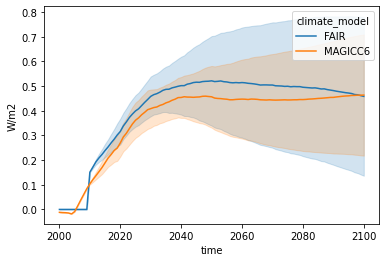

<IPython.core.display.Javascript object>

In [14]:
tmp = all_dat.filter(
    variable=[f"*Forcing|{v}|*|MED" for v in ["CH4", "N2O", "*Ozone", "Aerosol|Total"]]
)
tmp["climate_model"] = tmp["variable"].apply(lambda x: x.split("|")[-2])
display(tmp["climate_model"].unique())
tmp = tmp.process_over(
    "variable",
    "sum",
)
tmp["variable"] = "sum"
tmp = scmdata.ScmRun(tmp)
tmp.lineplot(hue="climate_model")

<AxesSubplot:xlabel='time', ylabel='°C'>

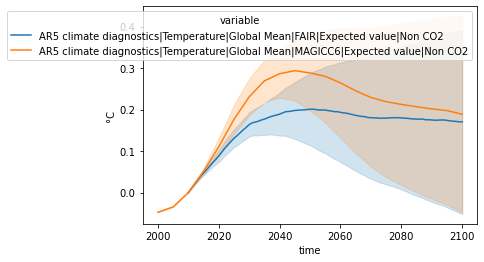

<IPython.core.display.Javascript object>

In [15]:
all_dat.filter(
    variable="AR5 climate diagnostics|Temperature|Global Mean|*|Expected value|Non CO2"
).relative_to_ref_period_mean(year=2010).lineplot(hue="variable")

<AxesSubplot:xlabel='time', ylabel='W/m2'>

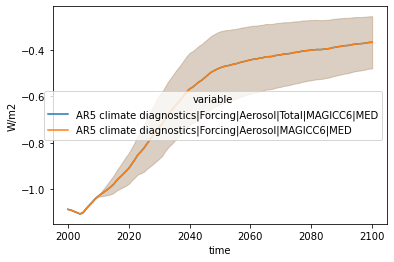

<IPython.core.display.Javascript object>

In [16]:
all_dat.filter(
    variable=["*Aerosol|Total|MAGICC6|MED", "*Aerosol|MAGICC6|MED"]
).lineplot(hue="variable")

In [17]:
sorted(all_dat["variable"].unique())

['AR5 climate diagnostics|Concentration|CO2|FAIR|MED',
 'AR5 climate diagnostics|Concentration|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Direct|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CH4|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CH4|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CO2|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|F-Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Kyoto Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Montreal Protocol (orig.) gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|N2O|FAIR|MED',
 'AR5 climate diagnostics|Forcing|N2O|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|OtherGHGs|FAIR|MED',


<IPython.core.display.Javascript object>

In [18]:
def determine_percentile(v):
    na = "not_applicable"

    if "Emissions" in v:
        return na

    if "|P" in v:
        return str(float(v.split("|")[-1].replace("P", "")))

    if "MED" in v:
        return "50.0"

    if "Expected value" in v:
        return "mean"

    return na


def determine_climate_model(v):
    if "MAGICC" in v:
        return "MAGICC6"

    if "FAIR" in v:
        return "FaIR1.3"

    return "not_applicable"


def strip_to_variable(v):
    out = v.replace("AR5 climate diagnostics|", "")

    if "Expected value|Non CO2" in out:
        out = "|".join(out.split("|")[:-2])
        out = out.replace("Temperature|Global Mean", "Temperature|Global Mean|Non-CO2")

    if "|P" in out or "MED" in out:
        out = "|".join(out.split("|")[:-1])

    if "MAGICC" in out or "FAIR" in out:
        out = "|".join(out.split("|")[:-1])

    replacements = (
        ("Temperature|Global Mean", "Surface Temperature (GSAT)"),
        ("Concentration|CO2", "Atmospheric Concentrations|CO2"),
        ("Aerosol|Total", "Aerosols"),
        ("Aerosols|Direct", "Aerosols|Direct Effect"),
        ("Aerosol|Direct", "Aerosols|Direct Effect"),
        ("Montreal Protocol (orig.) gases", "Montreal Protocol Halogen Gases"),
    )
    for old, new in replacements:
        out = out.replace(old, new)

    if "Exceedance" in out:
        t = out.split("|")[-1][:-3]
        out = "Exceedance Probability {}C".format(t)

    if "Non-CO2" in out:
        out = out.replace(
            "Surface Temperature (GSAT)", "Raw Surface Temperature (GSAT)"
        )

    return out


def convert_unit(u):
    unit_map = {
        "°C": "K",
        "-": "dimensionless",
        "ppm": "ppm",
        "W/m2": "W/m^2",
    }
    try:
        return unit_map[u]
    except KeyError:
        return u


to_save = all_dat.drop_meta(["category", "version"]).filter(
    variable=[
        "*P*Non CO2",
        "*MED*Non CO2",
        "*Expected value",
        "*Aerosol|MAGICC6*",
        #         "*Kyoto*",
        #         "*Montreal*",
        "*OtherGHGs*",
        #         "*Ozone*",
    ],
    keep=False,
)
display(sorted(to_save["variable"].unique()))
to_save["percentile"] = to_save["variable"].apply(determine_percentile)
to_save["methodology"] = "SR1.5"
to_save["climate_model"] = to_save["variable"].apply(determine_climate_model)
to_save["variable"] = to_save["variable"].apply(strip_to_variable)
to_save["unit"] = to_save["unit"].apply(convert_unit)
to_save

['AR5 climate diagnostics|Concentration|CO2|FAIR|MED',
 'AR5 climate diagnostics|Concentration|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Direct|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CH4|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CH4|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CO2|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|F-Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Kyoto Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Montreal Protocol (orig.) gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|N2O|FAIR|MED',
 'AR5 climate diagnostics|Forcing|N2O|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Tropospheric Ozone|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Tropospheric 

<scmdata.ScmRun (timeseries: 34190, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      Kyoto-GHG|2010 (SAR)   climate_model methodology           model  \
	0                  exclude         FaIR1.3       SR1.5   MERGE-ETL 6.0   
	1                  exclude         FaIR1.3       SR1.5  POLES CD-LINKS   
	2                  exclude         FaIR1.3       SR1.5  POLES CD-LINKS   
	3                  exclude         FaIR1.3       SR1.5  POLES CD-LINKS   
	4                  exclude         FaIR1.3       SR1.5  POLES CD-LINKS   
	...                    ...             ...         ...             ...   
	37877             in range  not_applicable       SR1.5     AIM/CGE 2.1   
	37878             in range  not_applicable       SR1.5     AIM/CGE 2.1   
	37879             in range  not_applicable       SR1.5     AIM/CGE 2.1   
	37880             in range  not_applicable       SR1.5     AIM/CGE 2.1   
	37881             in range  not_applicable       SR1.5

<IPython.core.display.Javascript object>

In [19]:
# all_dat.drop_meta(["category", "version"]).filter(
#     variable=[
#         "*P*Non CO2",
#         "*MED*Non CO2",
#         "*Non CO2",
#         "*Expected value*",
#     ]
# ).get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [20]:
to_save = to_save.filter(variable=["Emissions|PFC*", "Emissions|HFC*"], keep=False)
sorted(to_save.get_unique_meta("variable"))

['Atmospheric Concentrations|CO2',
 'Cumulative Emissions|CO2',
 'Emissions',
 'Emissions|BC',
 'Emissions|BC|AFOLU',
 'Emissions|BC|Energy',
 'Emissions|BC|Energy|Demand|Industry',
 'Emissions|BC|Energy|Demand|Residential and Commercial',
 'Emissions|BC|Energy|Demand|Transportation',
 'Emissions|BC|Energy|Supply',
 'Emissions|BC|Other',
 'Emissions|CH4',
 'Emissions|CH4|AFOLU',
 'Emissions|CH4|Energy',
 'Emissions|CH4|Energy|Demand|Industry',
 'Emissions|CH4|Energy|Demand|Residential and Commercial',
 'Emissions|CH4|Energy|Demand|Transportation',
 'Emissions|CH4|Energy|Supply',
 'Emissions|CH4|Other',
 'Emissions|CO',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|CO2|Energy and Industrial Processes',
 'Emissions|CO2|Energy|Demand',
 'Emissions|CO2|Energy|Demand|AFOFI',
 'Emissions|CO2|Energy|Demand|Industry',
 'Emissions|CO2|Energy|Demand|Other Sector',
 'Emissions|CO2|Energy|Demand|Residential and Commercial',
 'Emissions|CO2|Energy|Demand|Transportat

<IPython.core.display.Javascript object>

In [21]:
# AIM scenarios removed to make SR1.5 Table 2.4
aim_kwargs = dict(
    model="AIM*",
    scenario=["SFCM*_1p5Degree", "EMF33_Med2C_nofuel", "EMF33_Med2C_none"],
)
aim_scenarios_removed = to_save.filter(**aim_kwargs)
aim_scenarios_removed = pd.MultiIndex.from_frame(
    aim_scenarios_removed.meta[["model", "scenario"]].drop_duplicates()
)
aim_scenarios_removed

MultiIndex([('AIM/CGE 2.1',             'EMF33_Med2C_nofuel'),
            ('AIM/CGE 2.1',               'EMF33_Med2C_none'),
            ('AIM/CGE 2.0',        'SFCM_SSP2_Bio_1p5Degree'),
            ('AIM/CGE 2.0',       'SFCM_SSP2_EEEI_1p5Degree'),
            ('AIM/CGE 2.0',  'SFCM_SSP2_LifeStyle_1p5Degree'),
            ('AIM/CGE 2.0',        'SFCM_SSP2_Ref_1p5Degree'),
            ('AIM/CGE 2.0',     'SFCM_SSP2_ST_CCS_1p5Degree'),
            ('AIM/CGE 2.0',     'SFCM_SSP2_ST_bio_1p5Degree'),
            ('AIM/CGE 2.0', 'SFCM_SSP2_ST_nuclear_1p5Degree'),
            ('AIM/CGE 2.0',   'SFCM_SSP2_ST_solar_1p5Degree'),
            ('AIM/CGE 2.0',    'SFCM_SSP2_ST_wind_1p5Degree'),
            ('AIM/CGE 2.0',    'SFCM_SSP2_SupTech_1p5Degree'),
            ('AIM/CGE 2.0',   'SFCM_SSP2_combined_1p5Degree')],
           names=['model', 'scenario'])

<IPython.core.display.Javascript object>

In [22]:
tmp = to_save.timeseries().reset_index().set_index(["model", "scenario"])
tmp["aim_over_sampling"] = tmp.index.isin(aim_scenarios_removed)
tmp["aim_over_sampling"] = tmp["aim_over_sampling"].astype(str)

tmp["SR1.5 Table 2.4"] = (
    (tmp["Kyoto-GHG|2010 (SAR)"] == "in range") & (tmp["aim_over_sampling"] == "False")
).astype(str)

aim_removed = (
    tmp[tmp["aim_over_sampling"] == "True"]["SR1.5 Table 2.4"]
    .reset_index()
    .drop_duplicates()
)
assert aim_removed.shape[0] == 13
print("Aim removed")
display(aim_removed)

to_save = scmdata.ScmRun(tmp)
to_save

Aim removed


model                        scenario SR1.5 Table 2.4
0   AIM/CGE 2.1              EMF33_Med2C_nofuel           False
1   AIM/CGE 2.1                EMF33_Med2C_none           False
2   AIM/CGE 2.0         SFCM_SSP2_Bio_1p5Degree           False
3   AIM/CGE 2.0        SFCM_SSP2_EEEI_1p5Degree           False
4   AIM/CGE 2.0   SFCM_SSP2_LifeStyle_1p5Degree           False
5   AIM/CGE 2.0         SFCM_SSP2_Ref_1p5Degree           False
6   AIM/CGE 2.0      SFCM_SSP2_ST_CCS_1p5Degree           False
7   AIM/CGE 2.0      SFCM_SSP2_ST_bio_1p5Degree           False
8   AIM/CGE 2.0  SFCM_SSP2_ST_nuclear_1p5Degree           False
9   AIM/CGE 2.0    SFCM_SSP2_ST_solar_1p5Degree           False
10  AIM/CGE 2.0     SFCM_SSP2_ST_wind_1p5Degree           False
11  AIM/CGE 2.0     SFCM_SSP2_SupTech_1p5Degree           False
12  AIM/CGE 2.0    SFCM_SSP2_combined_1p5Degree           False

<scmdata.ScmRun (timeseries: 32725, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      Kyoto-GHG|2010 (SAR) SR1.5 Table 2.4 aim_over_sampling   climate_model  \
	0                  exclude           False             False         FaIR1.3   
	1                  exclude           False             False         FaIR1.3   
	2                  exclude           False             False         FaIR1.3   
	3                  exclude           False             False         FaIR1.3   
	4                  exclude           False             False         FaIR1.3   
	...                    ...             ...               ...             ...   
	32720             in range            True             False  not_applicable   
	32721             in range            True             False  not_applicable   
	32722             in range            True             False  not_applicable   
	32723             in range            True             False  not_app

<IPython.core.display.Javascript object>

In [23]:
sr15_output_db = scmdata.database.ScmDatabase(
    os.path.join(utils.DATA_DIR, "processed", "sr15-output"),
    levels=("variable", "percentile"),
)

<IPython.core.display.Javascript object>

In [24]:
sr15_output_db.delete()
sr15_output_db.save(to_save)

Saving to database: 0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

In [33]:
ar6_output_db = scmdata.database.ScmDatabase(
    os.path.join(
        utils.DATA_DIR,
        "processed",
        "ar6-output",
        "MAGICC",
        utils.AR6_OUTPUT_SR15_RAW_ID,
    ),
    levels=("variable", "percentile"),
)

<IPython.core.display.Javascript object>

In [34]:
sorted(to_save["variable"].unique())

['Atmospheric Concentrations|CO2',
 'Cumulative Emissions|CO2',
 'Emissions',
 'Emissions|BC',
 'Emissions|BC|AFOLU',
 'Emissions|BC|Energy',
 'Emissions|BC|Energy|Demand|Industry',
 'Emissions|BC|Energy|Demand|Residential and Commercial',
 'Emissions|BC|Energy|Demand|Transportation',
 'Emissions|BC|Energy|Supply',
 'Emissions|BC|Other',
 'Emissions|CH4',
 'Emissions|CH4|AFOLU',
 'Emissions|CH4|Energy',
 'Emissions|CH4|Energy|Demand|Industry',
 'Emissions|CH4|Energy|Demand|Residential and Commercial',
 'Emissions|CH4|Energy|Demand|Transportation',
 'Emissions|CH4|Energy|Supply',
 'Emissions|CH4|Other',
 'Emissions|CO',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|CO2|Energy and Industrial Processes',
 'Emissions|CO2|Energy|Demand',
 'Emissions|CO2|Energy|Demand|AFOFI',
 'Emissions|CO2|Energy|Demand|Industry',
 'Emissions|CO2|Energy|Demand|Other Sector',
 'Emissions|CO2|Energy|Demand|Residential and Commercial',
 'Emissions|CO2|Energy|Demand|Transportat

<IPython.core.display.Javascript object>

In [35]:
set(ar6_output_db.available_data()["variable"].unique())

{'Atmospheric-Concentrations-CH4',
 'Atmospheric-Concentrations-CO2',
 'Atmospheric-Concentrations-N2O',
 'Cumulative-Emissions-CO2',
 'Cumulative-Infilled-Emissions-CO2',
 'Effective-Radiative-Forcing',
 'Effective-Radiative-Forcing-Aerosols',
 'Effective-Radiative-Forcing-Aerosols-Direct-Effect',
 'Effective-Radiative-Forcing-Aerosols-Direct-Effect-BC',
 'Effective-Radiative-Forcing-Aerosols-Direct-Effect-OC',
 'Effective-Radiative-Forcing-Aerosols-Direct-Effect-Sulfur',
 'Effective-Radiative-Forcing-Aerosols-Indirect-Effect',
 'Effective-Radiative-Forcing-Basket-Anthropogenic',
 'Effective-Radiative-Forcing-Basket-Greenhouse-Gases',
 'Effective-Radiative-Forcing-Basket-Non-CO2-Anthropogenic',
 'Effective-Radiative-Forcing-Basket-Non-CO2-Greenhouse-Gases',
 'Effective-Radiative-Forcing-C2F6',
 'Effective-Radiative-Forcing-C6F14',
 'Effective-Radiative-Forcing-CF4',
 'Effective-Radiative-Forcing-CFC11',
 'Effective-Radiative-Forcing-CFC12',
 'Effective-Radiative-Forcing-CH4',
 'Effect

<IPython.core.display.Javascript object>

In [36]:
set(sr15_output_db.available_data()["variable"].unique()) - set(
    ar6_output_db.available_data()["variable"].unique()
)

{'Emissions',
 'Emissions-BC-AFOLU',
 'Emissions-BC-Energy',
 'Emissions-BC-Energy-Demand-Industry',
 'Emissions-BC-Energy-Demand-Residential-and-Commercial',
 'Emissions-BC-Energy-Demand-Transportation',
 'Emissions-BC-Energy-Supply',
 'Emissions-BC-Other',
 'Emissions-CH4-AFOLU',
 'Emissions-CH4-Energy',
 'Emissions-CH4-Energy-Demand-Industry',
 'Emissions-CH4-Energy-Demand-Residential-and-Commercial',
 'Emissions-CH4-Energy-Demand-Transportation',
 'Emissions-CH4-Energy-Supply',
 'Emissions-CH4-Other',
 'Emissions-CO-AFOLU',
 'Emissions-CO-Energy',
 'Emissions-CO-Energy-Demand-Industry',
 'Emissions-CO-Energy-Demand-Residential-and-Commercial',
 'Emissions-CO-Energy-Demand-Transportation',
 'Emissions-CO-Energy-Supply',
 'Emissions-CO-Other',
 'Emissions-CO2-Energy',
 'Emissions-CO2-Energy-Demand',
 'Emissions-CO2-Energy-Demand-AFOFI',
 'Emissions-CO2-Energy-Demand-Industry',
 'Emissions-CO2-Energy-Demand-Other-Sector',
 'Emissions-CO2-Energy-Demand-Residential-and-Commercial',
 'Em

<IPython.core.display.Javascript object>